Define `ufunc` and a Gaussian filter on `ScalarField` and `VectorField`
=======================================================================

In [2]:
import sys
import os
sys.path.append("/home/smets/codes/far/PHARE/pyphare/")
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
import numpy as np
%matplotlib inline

In [1]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
step = 0.2
Nx = 50
L = Nx*step
num_of_ghosts = 2
half = 20
sep = half*step

In [4]:
def f(x):
    y = x+0.4
    return np.exp(-0.1*y**2)*y
def g(x):
    return f(x)+np.random.rand(x.shape[0])*0.4-0.2
def h(x):
    return (1.4+np.sin(2*np.pi*x/L))*0.4

In [5]:
x = np.arange(0, L+2*num_of_ghosts*step, step)-num_of_ghosts*step
y = f(x)
z = g(x)
u = h(x)

In [6]:
from scipy.ndimage import gaussian_filter
t = gaussian_filter(z, sigma=2)

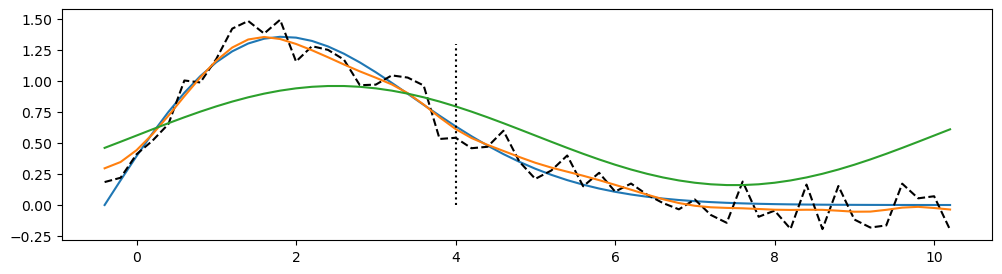

In [7]:
fig, ax = plt.subplots(figsize=(12, 3))

plt.plot(x, y)
plt.plot(x, z, 'k--')
plt.plot(x, t)
plt.plot(x, u)
plt.plot([sep, sep], [0, 1.3], 'k:')

In [16]:
# Build the patches by hand...
x1 = x[:half+2*num_of_ghosts]
x2 = x[half:]
y1 = z[:half+2*num_of_ghosts]
y2 = z[half:]
u1 = u[:half+2*num_of_ghosts]
u2 = u[half:]

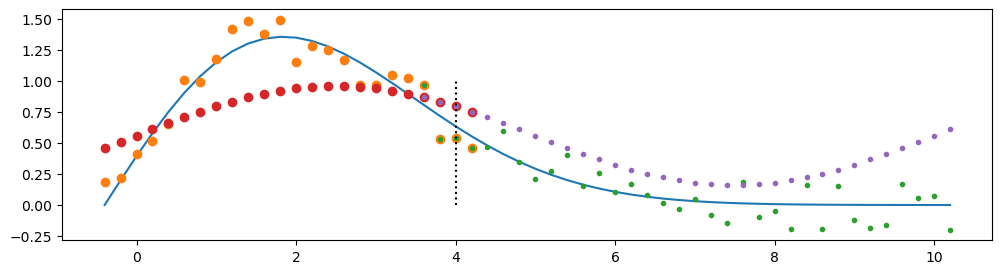

In [17]:
fig, ax = plt.subplots(figsize=(12, 3))

plt.plot(x, y)
plt.plot(x1, y1, 'o')
plt.plot(x2, y2, '.')
plt.plot(x1, u1, 'o')
plt.plot(x2, u2, '.')
plt.plot([sep, sep], [0, 1], 'k:')

In [18]:
def _disables_array_ufunc(obj):
    try:
        return obj.__array_ufunc__ is None
    except AttributeError:
        return False

In [73]:
class Patch():
    def __init__(self, data, idx, num_of_ghosts=2):
        assert(data.shape == idx.shape)
        self.data = np.array(data)
        self.nx = self.data.shape[0]
        self.idx = np.array(idx)
        self.num_of_ghosts = num_of_ghosts
    def __add__(self, other):
        if _disables_array_ufunc(other):
            return NotImplemented
        assert(self.data.shape == other.data.shape)
        return Patch(np.add(self.data, other.data), self.idx, self.num_of_ghosts)
    def __mul__(self, other):
        if _disables_array_ufunc(other):
            return NotImplemented
        return np.multiply(self, other)
    def __array_ufunc__(self, ufunc, method, *inputs, **kwargs):
        print(f"__array_function__ appelé pour {ufunc.__name__}")
        if method != "__call__":
            raise NotImplementedError
        unwrapped = [i.data if isinstance(i, Patch) else i for i in inputs]
        result = getattr(ufunc, method)(*unwrapped, **kwargs)
        if isinstance(result, np.ndarray):
            return Patch(result, self.idx, self.num_of_ghosts)
    # -------------------------------------------------------------------------
    def __array__(self):
        """Conversion vers un vrai numpy array si nécessaire"""
        print("zob")
        return self.data
    def __array_function__(self, func, types, args, kwargs):
        print("zobi")
        print(f"__array_function__ appelé pour {func.__name__}")
        if func is not gaussian_filter:
            raise NotImplementedError
        unwrapped_args = [a.data if isinstance(a, Patch) else a for a in args]
        result = func(*unwrapped_args, **kwargs)
        if isinstance(result, np.ndarray):
            return Patch(result, self.idx, self.num_of_ghosts)
        # data = np.ones(self.data.shape)*0.1
    # -------------------------------------------------------------------------
    def __repr__(self):
        return """
        data : {0}
        idx  : {1}
        nx   = {2}""".format(self.data, self.idx, self.nx)

In [42]:
    values = ufunc(*list(map(_values, inputs)), **{name: _values(value) for name, value in kwargs}, out=_out)

def __array_ufunc__(self, ufunc, method, *inputs, **kwargs):
    print(f"[__array_ufunc__] {ufunc.__name__} appelé sur {[getattr(i, 'name', i) for i in inputs]}")
    
    # Dérive les données sous-jacentes
    unwrapped = [i.data if isinstance(i, TrackedArray) else i for i in inputs]
    result = getattr(ufunc, method)(*unwrapped, **kwargs)
    
    # Renvoie un TrackedArray si le résultat est un ndarray
    if isinstance(result, np.ndarray):
        return TrackedArray(result, name=f"({'+'.join(getattr(i, 'name', str(i)) for i in inputs)})")
    else:
        return result


def __array_function__(self, func, types, args, kwargs):
    print(f"[__array_function__] {func.__name__} appelé avec {[getattr(a, 'name', a) for a in args]}")
    
    # Applique la fonction standard sur les données réelles
    unwrapped_args = [a.data if isinstance(a, TrackedArray) else a for a in args]
    result = func(*unwrapped_args, **kwargs)
    
    # Si le résultat est un ndarray, on le ré-emballe
    if isinstance(result, np.ndarray):
        return TrackedArray(result, name=f"{func.__name__}_result")
    else:
        return result

            
    if method != "__call__":
    return NotImplemented

IndentationError: expected an indented block after function definition on line 3 (3708139344.py, line 4)

In [74]:
py1 = Patch(y1, x1)
py2 = Patch(y2, x2)
pu1 = Patch(u1, x1)
pu2 = Patch(u2, x2)

In [21]:
ps1 = py1+pu1
ps2 = py2+pu2

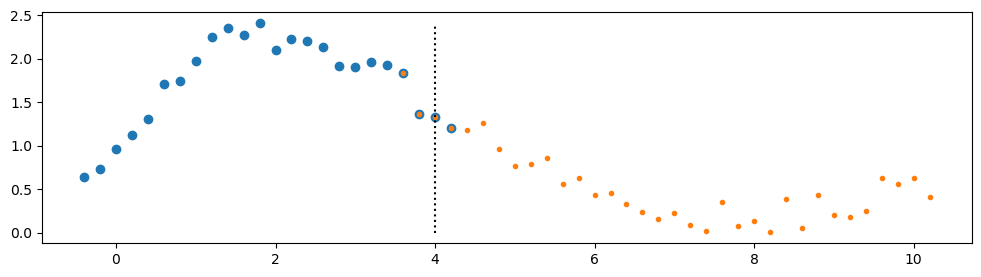

In [22]:
fig, ax = plt.subplots(figsize=(12, 3))

plt.plot(ps1.idx, ps1.data, 'o')
plt.plot(ps2.idx, ps2.data, '.')
plt.plot([sep, sep], [0, 2.4], 'k:')

In [75]:
print(py1)
print(np.exp(py1))


        data : [0.18508377 0.21965196 0.40894189 0.51852519 0.65270884 1.00370099
 0.98786722 1.17729284 1.42165122 1.48325963 1.3820313  1.49305008
 1.1566211  1.28012393 1.25059586 1.17229283 0.96560588 0.97049658
 1.04479153 1.02719044 0.96359705 0.53233937 0.54182563 0.45783388]
        idx  : [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2
  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2]
        nx   = 24
__array_function__ appelé pour exp

        data : [1.20331923 1.24564312 1.50522426 1.67954881 1.92073676 2.72836079
 2.68550077 3.245576   4.14395737 4.40728844 3.98298405 4.45064969
 3.17917301 3.59708547 3.49242333 3.22938861 2.62637845 2.63925473
 2.84280583 2.79320713 2.62110779 1.7029114  1.71914251 1.58064641]
        idx  : [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2
  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2]
        nx   = 24


In [69]:
print(py1)
from scipy.ndimage import gaussian_filter
print(gaussian_filter(py1, sigma=2))


        data : [0.18508377 0.21965196 0.40894189 0.51852519 0.65270884 1.00370099
 0.98786722 1.17729284 1.42165122 1.48325963 1.3820313  1.49305008
 1.1566211  1.28012393 1.25059586 1.17229283 0.96560588 0.97049658
 1.04479153 1.02719044 0.96359705 0.53233937 0.54182563 0.45783388]
        idx  : [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2
  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2]
        nx   = 24
zob
[0.29594997 0.34662367 0.44175858 0.57062124 0.72011611 0.87687346
 1.02866502 1.16372845 1.26932361 1.33413748 1.35453166 1.33787767
 1.29815154 1.24731203 1.19112799 1.1328605  1.07718055 1.02606856
 0.97208879 0.90181095 0.80973189 0.7080133  0.62103028 0.57149573]


In [24]:
import numpy as np
a = np.array([1])
shape = (2, 2)
a.__array_function__(func=np.broadcast_to, types=(np.ndarray,), args=(a, shape), kwargs={})

array([[1, 1],
       [1, 1]])

In [17]:
np.broadcast_to(a, shape)

array([[1, 1],
       [1, 1]])

In [18]:
class Hierarchy():
    def __init__(self, patches):
        self.patches = patches
    def __repr__(self):
        return """
        p1 : {0}
        p2 : {1}
        """.format(self.patches[0], self.patches[1])

In [19]:
hy = Hierarchy([py1, py2])

In [20]:
print(hy)


        p1 : 
        data : [0.04412835 0.35624536 0.57767594 0.65183168 0.81486665 1.08556074
 1.08012009 1.01370439 1.24345195 1.45124292 1.3532265  1.36249752
 1.22774895 1.44858801 1.35393241 1.03856692 1.07800189 0.9137145
 1.11034851 0.89835148 0.73701132 0.52594949 0.44516401 0.47051087]
        idx  : [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2
  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2]
        nx   = 24
        p2 : 
        data : [ 0.73701132  0.52594949  0.44516401  0.47051087  0.46418061  0.30977848
  0.23498757  0.15547167  0.32106225  0.31407775  0.03391621  0.07915524
 -0.0237552   0.04043484  0.08278964  0.06386835 -0.09555392 -0.1536585
  0.10765666 -0.06598574  0.16276168  0.01398863  0.01828417  0.1980083
 -0.09986778 -0.05305786 -0.11520557 -0.11595435 -0.15028008  0.05731176
 -0.16655966  0.18250693  0.18146222  0.18366313]
        idx  : [ 3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2
  6.4  6.6  6.8  7

In [21]:
q = gaussian_filter(hy, sigma=3)

In [22]:
print(hy, q)


        p1 : 
        data : [0.04412835 0.35624536 0.57767594 0.65183168 0.81486665 1.08556074
 1.08012009 1.01370439 1.24345195 1.45124292 1.3532265  1.36249752
 1.22774895 1.44858801 1.35393241 1.03856692 1.07800189 0.9137145
 1.11034851 0.89835148 0.73701132 0.52594949 0.44516401 0.47051087]
        idx  : [-0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2
  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2]
        nx   = 24
        p2 : 
        data : [ 0.73701132  0.52594949  0.44516401  0.47051087  0.46418061  0.30977848
  0.23498757  0.15547167  0.32106225  0.31407775  0.03391621  0.07915524
 -0.0237552   0.04043484  0.08278964  0.06386835 -0.09555392 -0.1536585
  0.10765666 -0.06598574  0.16276168  0.01398863  0.01828417  0.1980083
 -0.09986778 -0.05305786 -0.11520557 -0.11595435 -0.15028008  0.05731176
 -0.16655966  0.18250693  0.18146222  0.18366313]
        idx  : [ 3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2
  6.4  6.6  6.8  7

In [76]:
import numpy as np
from scipy.ndimage import gaussian_filter

class LabeledArray:
    def __init__(self, data, unit=None, spacing=1.0):
        self.data = np.asarray(data)
        self.unit = unit
        self.spacing = spacing  # taille de pixel, par ex.

    def __repr__(self):
        return (f"LabeledArray(shape={self.data.shape}, unit={self.unit!r}, "
                f"spacing={self.spacing})")

    def __array__(self):
        """Conversion implicite en numpy.ndarray"""
        return self.data

    def __array_function__(self, func, types, args, kwargs):
        """
        Intercepte les appels du type gaussian_filter(self, ...)
        """
        # Vérifier qu'on est bien appelé pour gaussian_filter
        if func is not gaussian_filter:
            return NotImplemented

        print(f"Appel intercepté : {func.__name__}")

        # Extraire les paramètres
        sigma = kwargs.get("sigma", 1.0)

        # Appliquer le filtre sur les données internes
        # Note : gaussian_filter va convertir self en ndarray via __array__()
        filtered = gaussian_filter(self.data, sigma=sigma)

        # Optionnel : ajuster les métadonnées (ici, on garde unit et spacing)
        return LabeledArray(filtered, unit=self.unit, spacing=self.spacing)

# --- Exemple d'utilisation ---

img = LabeledArray(np.random.rand(6, 6), unit="mV", spacing=0.5)

print("Avant :", img)
smoothed = gaussian_filter(img, sigma=1.0)
print("Après :", smoothed)


Avant : LabeledArray(shape=(6, 6), unit='mV', spacing=0.5)
Après : [[0.42368483 0.45189563 0.51934741 0.54590745 0.52084468 0.51377005]
 [0.40737083 0.49800738 0.56985539 0.51193846 0.42691948 0.42981292]
 [0.41812509 0.50729286 0.55240815 0.45827742 0.38557159 0.42287524]
 [0.47769041 0.50307528 0.49200558 0.41561401 0.39262648 0.444662  ]
 [0.42070394 0.42983809 0.42115286 0.38745851 0.37957318 0.38269855]
 [0.34099513 0.350633   0.36827105 0.39703315 0.420269   0.37834021]]
